<a href="https://colab.research.google.com/github/evoluteorburn-lab/HSE_exam_DS16_GusevA/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0__%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_DS16_GusevAlx_ipynb__(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Анализ недвижимости по заказу клиента с применением Искусственного Интеллекта **   
*итоговая работа Гусева Александра Сергеевича DS-16"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from joblib import dump, load



загрузка файла

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name = next(iter(uploaded))
data = pd.read_excel(file_name)
columns = data.columns.tolist()

Saving Cian.xlsx to Cian.xlsx


Первые 5 строк датасета:

In [ ]:
print("Первые 5 строк датасета:")
display(data.head())

Первые 5 строк датасета:


,ID Корпуса,ID ЖК,ЖК рус,ЖК англ,Корпус,кр Корпус,Регион,Школа/Детский Сад,Парк/Зона отдыха,Спорт,...,Отделка К,Договор К,Сдача К,Цена со скидкой,Зона,Отделка текст,Старт продаж К,Изменение цены последнее,Экспозиция,Изменение цены
0,16302,6082,Парк Сайд,NaN,Парк Сайд корп. 4,корпус 4,Москва,1км,500м,300м,...,0 - Нет,Эскроу,3 кв 2025,0,ТТК - МКАД,NaN,2022.5,0,30,1075579
1,16302,6082,Парк Сайд,NaN,Парк Сайд корп. 4,корпус 4,Москва,1км,500м,300м,...,0 - Нет,Эскроу,3 кв 2025,0,ТТК - МКАД,NaN,2022.5,0,16,0
2,16302,6082,Парк Сайд,NaN,Парк Сайд корп. 4,корпус 4,Москва,1км,500м,300м,...,0 - Нет,Эскроу,3 кв 2025,0,ТТК - МКАД,NaN,2022.5,0,16,0
3,16302,6082,Парк Сайд,NaN,Парк Сайд корп. 4,корпус 4,Москва,1км,500м,300м,...,0 - Нет,Эскроу,3 кв 2025,0,ТТК - МКАД,NaN,2022.5,0,30,1252284
4,16302,6082,Парк Сайд,NaN,Парк Сайд корп. 4,корпус 4,Москва,1км,500м,300м,...,0 - Нет,Эскроу,3 кв 2025,0,ТТК - МКАД,NaN,2022.5,0,30,1272084


Выводим размерность датасета

In [ ]:
print("Размер датасета (строки, столбцы):", data.shape)

Размер датасета (строки, столбцы): (711, 46)


In [ ]:
data = pd.read_excel(file_name)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID Корпуса                711 non-null    int64         
 1   ID ЖК                     711 non-null    int64         
 2   ЖК рус                    711 non-null    object        
 3   ЖК англ                   96 non-null     object        
 4   Корпус                    711 non-null    object        
 5   кр Корпус                 711 non-null    object        
 6   Регион                    711 non-null    object        
 7   Школа/Детский Сад         711 non-null    object        
 8   Парк/Зона отдыха          711 non-null    object        
 9   Спорт                     711 non-null    object        
 10  Парковка                  711 non-null    object        
 11  Рестораны                 711 non-null    object        
 12  Метро                 

<Figure size 1200x1000 with 0 Axes>

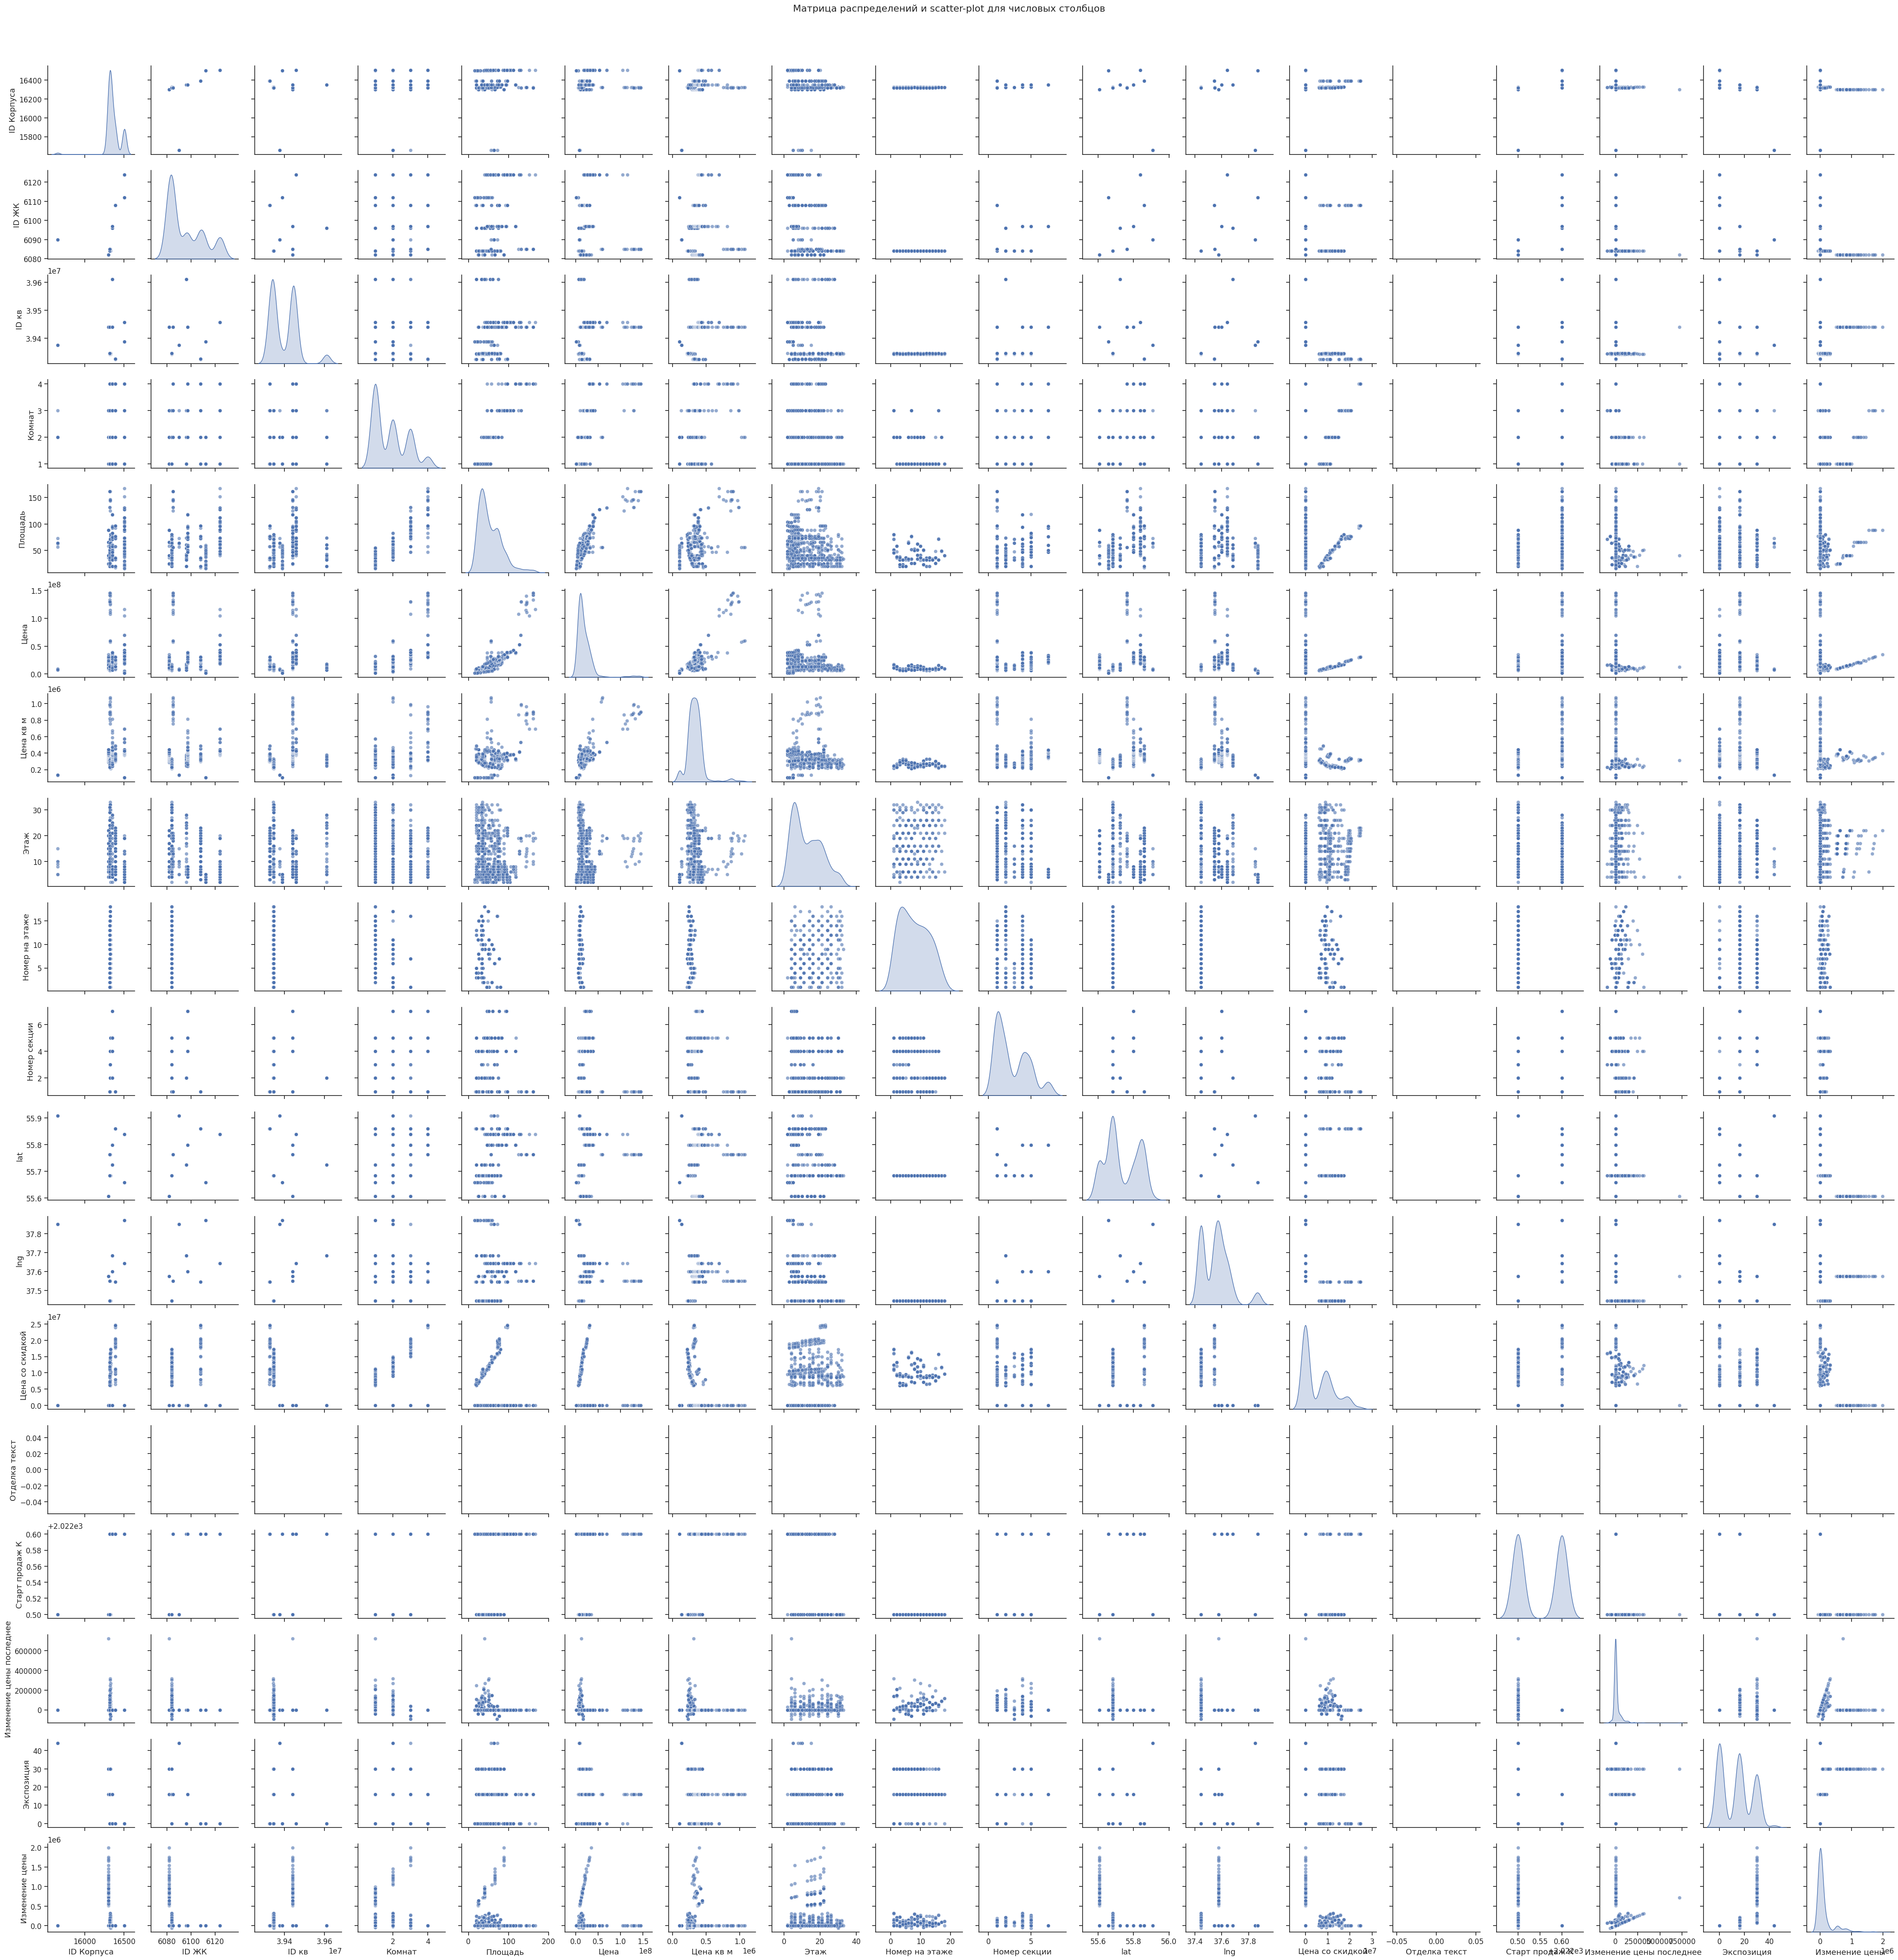

In [ ]:
sns.set(style="ticks", font_scale=1.1)
plt.figure(figsize=(12, 10))
sns.pairplot(data, diag_kind='kde', corner=False, plot_kws={'alpha': 0.6})
plt.suptitle("Матрица распределений и scatter-plot для числовых столбцов", y=1.02)
plt.show()

Матрица корреляций (только числовые столбцы):


,ID Корпуса,ID ЖК,ID кв,Комнат,Площадь,Цена,Цена кв м,Этаж,Номер на этаже,Номер секции,lat,lng,Цена со скидкой,Отделка текст,Старт продаж К,Изменение цены последнее,Экспозиция,Изменение цены
ID Корпуса,1.000000,0.697143,0.138892,0.203461,0.228565,0.167813,0.120708,-0.274630,-0.056043,-0.261664,0.292711,0.239008,-0.053991,NaN,0.562078,-0.110854,-0.663867,-0.234602
ID ЖК,0.697143,1.000000,0.185297,0.401311,0.415393,0.229662,0.118967,-0.439238,NaN,-0.230674,0.770642,0.575447,-0.083879,NaN,0.827682,-0.232975,-0.767811,-0.400888
ID кв,0.138892,0.185297,1.000000,0.054349,0.172370,0.228565,0.314746,-0.205595,-0.006093,0.221661,-0.049284,0.559213,-0.762959,NaN,0.327062,-0.202341,-0.105152,0.132452
Комнат,0.203461,0.401311,0.054349,1.000000,0.896313,0.655211,0.295900,-0.203567,-0.204126,0.117609,0.536890,0.183657,0.141681,NaN,0.526547,-0.178788,-0.243806,-0.177763
Площадь,0.228565,0.415393,0.172370,0.896313,1.000000,0.832763,0.431004,-0.201680,-0.072903,0.034757,0.505624,0.197091,-0.013886,NaN,0.505605,-0.166194,-0.230705,-0.122510
Цена,0.167813,0.229662,0.228565,0.655211,0.832763,1.000000,0.785995,-0.093522,-0.078977,-0.084049,0.356876,0.105755,-0.178104,NaN,0.428085,-0.143181,-0.148565,-0.101981
Цена кв м,0.120708,0.118967,0.314746,0.295900,0.431004,0.785995,1.000000,-0.023393,-0.027472,-0.072476,0.273720,-0.006591,-0.309309,NaN,0.342356,-0.161217,-0.063966,0.001704
Этаж,-0.274630,-0.439238,-0.205595,-0.203567,-0.201680,-0.093522,-0.023393,1.000000,0.134795,-0.256087,-0.296919,-0.449595,0.302613,NaN,-0.427088,0.137996,0.243593,0.201231
Номер на этаже,-0.056043,NaN,-0.006093,-0.204126,-0.072903,-0.078977,-0.027472,0.134795,1.000000,-0.189688,NaN,NaN,-0.078977,NaN,NaN,0.140815,-0.110246,-0.037916
Номер секции,-0.261664,-0.230674,0.221661,0.117609,0.034757,-0.084049,-0.072476,-0.256087,-0.189688,1.000000,-0.181608,0.078885,-0.401639,NaN,-0.065878,-0.036627,0.575375,0.238482


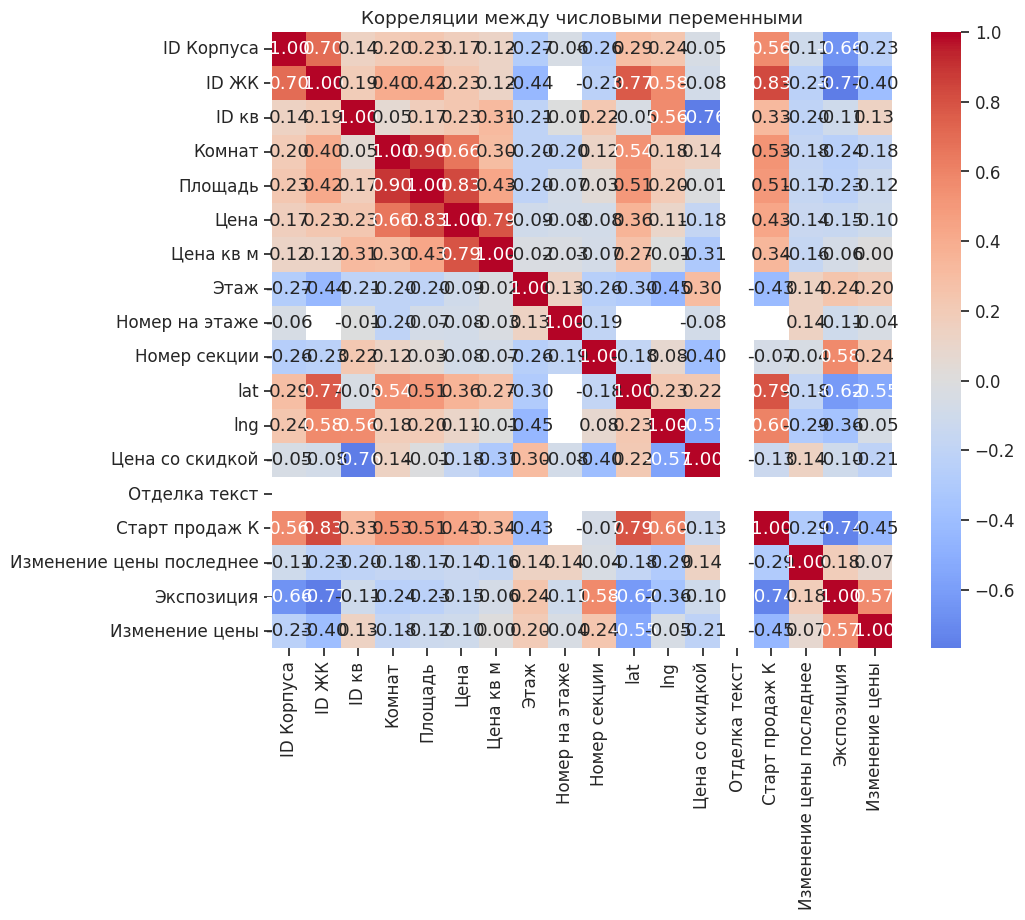

In [ ]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

print("Матрица корреляций (только числовые столбцы):")
display(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".02f")
plt.title("Корреляции между числовыми переменными")
plt.show()

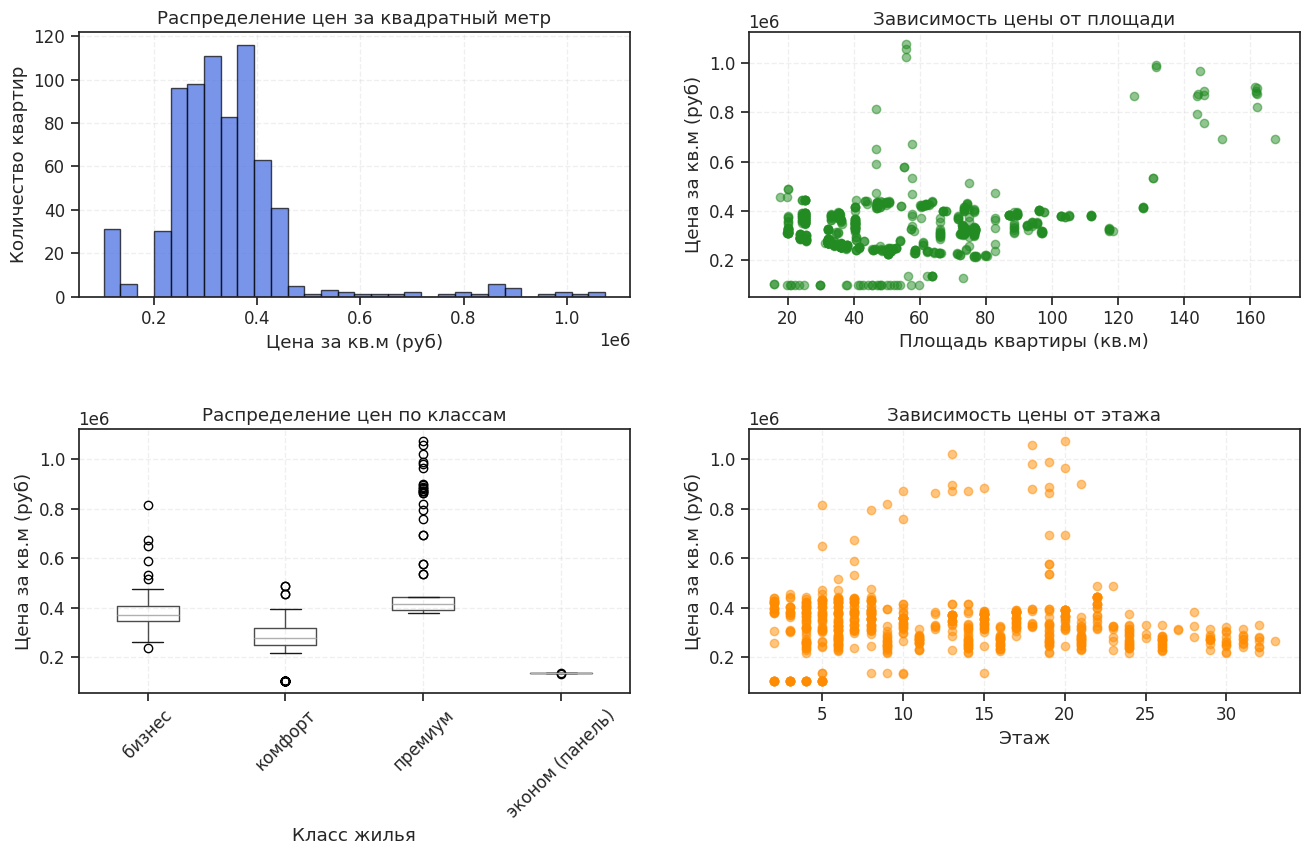

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.hist(data['Цена кв м'].dropna(), bins=30, color='royalblue', alpha=0.7, edgecolor='black')
plt.xlabel('Цена за кв.м (руб)')
plt.ylabel('Количество квартир')
plt.title('Распределение цен за квадратный метр')
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(2, 2, 2)
plt.scatter(data['Площадь'], data['Цена кв м'], color='forestgreen', alpha=0.5)
plt.xlabel('Площадь квартиры (кв.м)')
plt.ylabel('Цена за кв.м (руб)')
plt.title('Зависимость цены от площади')
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(2, 2, 3)
data.boxplot(column='Цена кв м', by='Класс К....', ax=plt.gca())
plt.xlabel('Класс жилья')
plt.ylabel('Цена за кв.м (руб)')
plt.title('Распределение цен по классам')
plt.suptitle('')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)


plt.subplot(2, 2, 4)
plt.scatter(data['Этаж'], data['Цена кв м'], color='darkorange', alpha=0.5)
plt.xlabel('Этаж')
plt.ylabel('Цена за кв.м (руб)')
plt.title('Зависимость цены от этажа')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
X = data.drop('Площадь', axis=1)
y = data['Цена кв м']

print("\nПервые 5 строк X:")
print(X.head())

print("\nПервые 5 значений y:")
print(y.head())


Первые 5 строк X:
   ID Корпуса  ID ЖК     ЖК рус ЖК англ             Корпус кр Корпус  Регион  \
0       16302   6082  Парк Сайд     NaN  Парк Сайд корп. 4  корпус 4  Москва   
1       16302   6082  Парк Сайд     NaN  Парк Сайд корп. 4  корпус 4  Москва   
2       16302   6082  Парк Сайд     NaN  Парк Сайд корп. 4  корпус 4  Москва   
3       16302   6082  Парк Сайд     NaN  Парк Сайд корп. 4  корпус 4  Москва   
4       16302   6082  Парк Сайд     NaN  Парк Сайд корп. 4  корпус 4  Москва   

  Школа/Детский Сад Парк/Зона отдыха Спорт  ... Отделка К Договор К  \
0               1км             500м  300м  ...   0 - Нет    Эскроу   
1               1км             500м  300м  ...   0 - Нет    Эскроу   
2               1км             500м  300м  ...   0 - Нет    Эскроу   
3               1км             500м  300м  ...   0 - Нет    Эскроу   
4               1км             500м  300м  ...   0 - Нет    Эскроу   

     Сдача К  Цена со скидкой        Зона  Отделка текст  Старт продаж К 

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

poly_features = full_pipeline.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    poly_features,
    y,
    test_size=0.3,
    random_state=101
)

print("Размеры данных:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Размеры данных:
Обучающая выборка: (497, 241859)
Тестовая выборка: (214, 241859)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Отделка текст']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


=== Результаты оценки ===
R² Score: 0.9990
MAE: 2502.0085
MSE: 16891577.4909
RMSE: 4109.9364

Топ-10 важнейших признаков:
                                            Feature  Coefficient
4833           num__Цена кв м cat__Договор К_Эскроу  8312.592693
5                                    num__Цена кв м  8312.592693
4811       num__Цена кв м cat__Тип корпуса_Квартиры  8094.680549
4827     num__Цена кв м cat__Тип помещения_Квартира  8094.680549
4202              num__Цена кв м cat__Регион_Москва  8071.109961
4817           num__Цена кв м cat__Тип кв/ап_Студия  7431.550993
4175              num__Цена кв м cat__ЖК англ_Pride  6792.514566
4828  num__Цена кв м cat__Отделка помещения_0 - Нет  5936.527166
4830          num__Цена кв м cat__Отделка К_0 - Нет  5936.527166
4220          num__Цена кв м cat__Парковка_во дворе  5555.577055


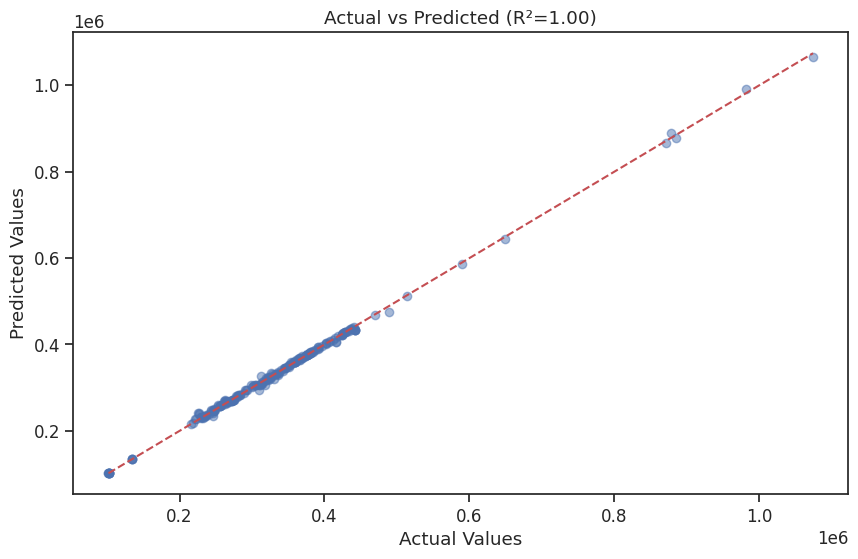

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polymodel = LinearRegression()
polymodel.fit(X_train, y_train)

y_pred = polymodel.predict(X_test)

print("=== Результаты оценки ===")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

try:
    if 'full_pipeline' in globals():
        poly_feature_names = full_pipeline.named_steps['poly'].get_feature_names_out(
            input_features=full_pipeline.named_steps['preprocessor'].get_feature_names_out()
        )

        coef_df = pd.DataFrame({
            'Feature': poly_feature_names,
            'Coefficient': polymodel.coef_
        }).sort_values('Coefficient', key=abs, ascending=False)

        print("\nТоп-10 важнейших признаков:")
        print(coef_df.head(10))
    else:
        print("\nИнформация: full_pipeline не определен, невозможно получить названия признаков")

except Exception as e:
    print("\nНе удалось получить названия признаков:", str(e))
    print("Количество коэффициентов:", len(polymodel.coef_))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R²={r2_score(y_test, y_pred):.2f})')
plt.show()

Сравнение предсказаний с реальными значениями:


,Actual,Predicted,Residual
0,375240,375761.66,-521.66
1,375240,375740.91,-500.91
2,246500,241625.80,4874.20
3,232400,230284.81,2115.19
4,428017,428016.69,0.31



Статистика остатков:
count      214.000000
mean        36.192477
std       4119.412796
min     -15288.270000
25%      -1322.855000
50%         -5.610000
75%       1103.130000
max      13916.530000
Name: Residual, dtype: float64


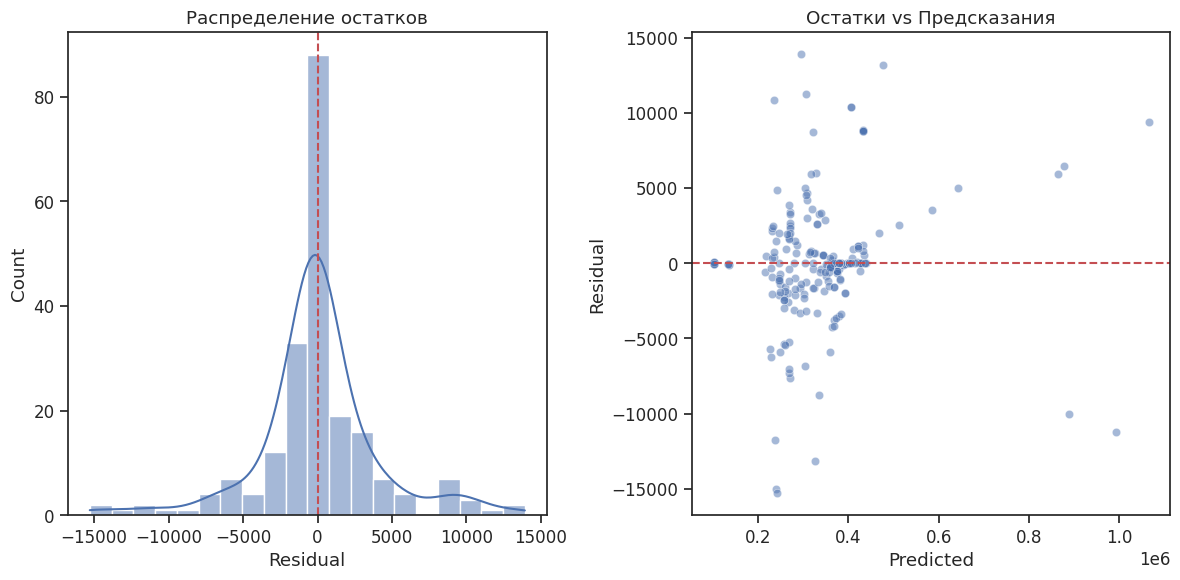


Топ-5 лучших предсказаний:


,Actual,Predicted,Residual
9,440423,440423.13,-0.13
130,414209,414209.13,-0.13
36,428384,428384.23,-0.23
172,406060,406060.25,-0.25
93,438126,438125.74,0.26



Топ-5 худших предсказаний:


,Actual,Predicted,Residual
191,226200,241488.27,-15288.27
73,225300,240276.12,-14976.12
122,309202,295285.47,13916.53
5,489052,475903.97,13148.03
162,313018,326158.55,-13140.55


In [ ]:

results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Residual': y_test.values - y_pred
}).round(2)

print("Сравнение предсказаний с реальными значениями:")
display(results_df.head())

print("\nСтатистика остатков:")
print(results_df['Residual'].describe())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(results_df['Residual'], kde=True, bins=20)
plt.title('Распределение остатков')
plt.axvline(0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Predicted', y='Residual', data=results_df, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Остатки vs Предсказания')

plt.tight_layout()
plt.show()

print("\nТоп-5 лучших предсказаний:")
display(results_df.sort_values('Residual', key=abs).head())

print("\nТоп-5 худших предсказаний:")
display(results_df.sort_values('Residual', key=abs, ascending=False).head())

/tmp/ipython-input-969481067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics_df.index, y='Value',


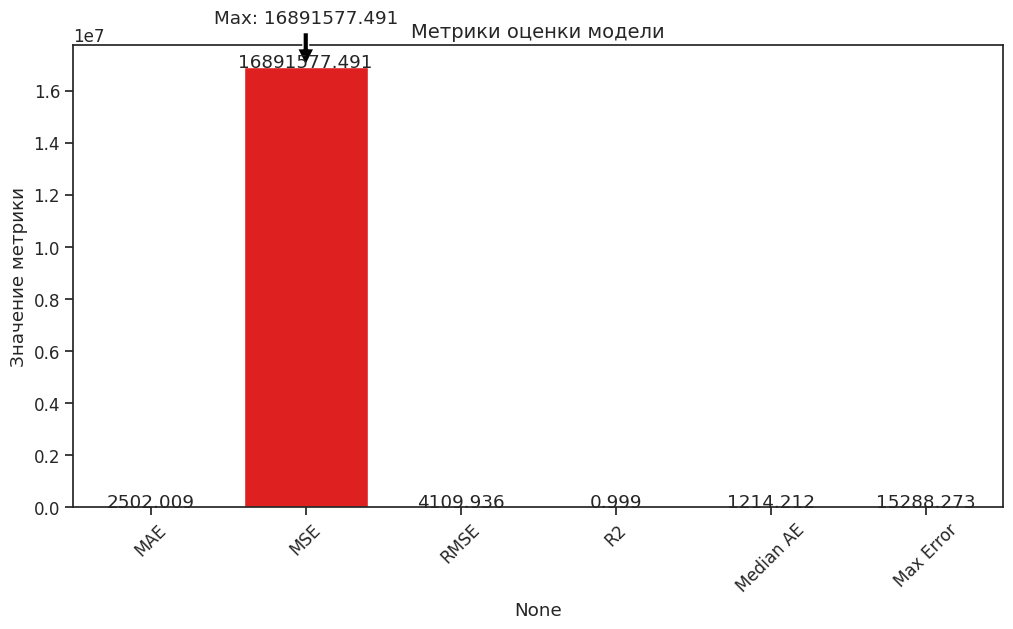

Результаты оценки модели:


,Value
MAE,2.502009e+03
MSE,1.689158e+07
RMSE,4.109936e+03
R2,9.990000e-01
Median AE,1.214212e+03
Max Error,1.528827e+04



Самый высокий показатель ошибки: MSE = 16891577.491
Метрика MSE является самой высокой среди ошибок
Это означает, что модель имеет наибольшие квадратичные отклонения
Рекомендации:
- Проверить наличие выбросов в данных
- Попробовать другие алгоритмы (Random Forest, Gradient Boosting)
- Добавить регуляризацию в модель

Статистика остатков:


,count,mean,std,min,25%,50%,75%,max
Цена кв м,214.0,36.192627,4119.41314,-15288.273299,-1322.857131,-5.612639,1103.132766,13916.531904


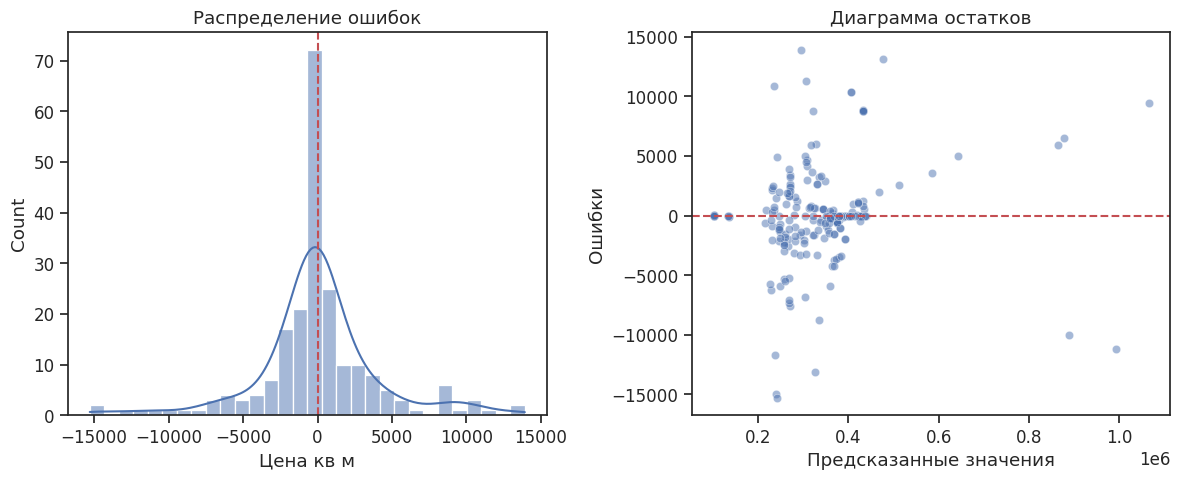

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

metrics_dict = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred),
    'MSE': metrics.mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    'R2': metrics.r2_score(y_test, y_pred),
    'Median AE': metrics.median_absolute_error(y_test, y_pred),
    'Max Error': metrics.max_error(y_test, y_pred)
}

metrics_df = pd.DataFrame.from_dict(metrics_dict,
                                  orient='index',
                                  columns=['Value']).round(3)

error_metrics = metrics_df.drop('R2')
max_metric = error_metrics.loc[error_metrics['Value'].idxmax()]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=metrics_df.index, y='Value',
                data=metrics_df.reset_index(),
                palette=['red' if x == max_metric.name else 'blue' for x in metrics_df.index])
plt.title('Метрики оценки модели', fontsize=14)
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)

max_value = max_metric['Value']
max_index = list(metrics_df.index).index(max_metric.name)
ax.annotate(f'Max: {max_value:.3f}',
           xy=(max_index, max_value),
           xytext=(max_index, max_value + 0.1*max_value),
           ha='center',
           arrowprops=dict(facecolor='black', shrink=0.05))

for i, v in enumerate(metrics_df['Value']):
    plt.text(i, v+0.01, str(v), ha='center')
plt.show()

print("Результаты оценки модели:")
display(metrics_df)

print(f"\nСамый высокий показатель ошибки: {max_metric.name} = {max_value:.3f}")
if max_metric.name == 'MSE':
    print("Метрика MSE является самой высокой среди ошибок")
    print("Это означает, что модель имеет наибольшие квадратичные отклонения")
    print("Рекомендации:")
    print("- Проверить наличие выбросов в данных")
    print("- Попробовать другие алгоритмы (Random Forest, Gradient Boosting)")
    print("- Добавить регуляризацию в модель")

residuals = y_test - y_pred
print("\nСтатистика остатков:")
display(pd.DataFrame(residuals.describe()).transpose())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Распределение ошибок')
plt.axvline(0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибки')
plt.title('Диаграмма остатков')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import issparse
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

X = pd.DataFrame({
    'numeric1': [1, 2, 3, np.nan, 5, 6],
    'numeric2': [1.1, 2.2, 3.3, 4.4, 5.5, 6.6],
    'categorical': ['A', 'B', 'A', 'C', 'B', 'A']
})

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # sparse_output=False для получения массива
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['numeric1', 'numeric2']),
        ('cat', categorical_transformer, ['categorical'])
    ]
)

X_processed = preprocessor.fit_transform(X)

print(f"Тип X_processed: {type(X_processed)}")

if issparse(X_processed):
    print("\nРазреженная матрица (sparse matrix) - проверка пропущенных значений:")
    X_dense = X_processed.toarray()
    print(f"Всего элементов: {X_dense.size}")
    print(f"Пропущенных значений (NaN): {np.isnan(X_dense).sum()}")
    print(f"Нулевых элементов: {np.sum(X_dense == 0)}")
else:
    print("\nПроверка пропущенных значений в массиве:")
    print(f"Всего элементов: {X_processed.size}")
    print(f"Пропущенных значений (NaN): {np.isnan(X_processed).sum()}")
    print(f"Бесконечных значений (inf): {np.isinf(X_processed).sum()}")

print("\nФорма данных:", X_processed.shape)
print("Тип данных в массиве:", X_processed.dtype)

print("\nПример первых 5 строк:")
print(X_processed[:5])

print(f"\nМинимальное значение: {np.min(X_processed)}")
print(f"Максимальное значение: {np.max(X_processed)}")
print(f"Среднее значение: {np.mean(X_processed):.3f}")
print(f"Стандартное отклонение: {np.std(X_processed):.3f}")

try:
    feature_names = preprocessor.get_feature_names_out()
    X_df = pd.DataFrame(X_processed, columns=feature_names)
    print(f"\nИмена признаков: {feature_names}")
    print("\nПервые 5 строк в DataFrame:")
    display(X_df.head())
except:
    print("\nНе удалось получить имена признаков")

Тип X_processed: <class 'numpy.ndarray'>

Проверка пропущенных значений в массиве:
Всего элементов: 30
Пропущенных значений (NaN): 0
Бесконечных значений (inf): 0

Форма данных: (6, 5)
Тип данных в массиве: float64

Пример первых 5 строк:
[[-1.37281295 -1.46385011  1.          0.          0.        ]
 [-0.78446454 -0.87831007  0.          1.          0.        ]
 [-0.19611614 -0.29277002  1.          0.          0.        ]
 [-0.19611614  0.29277002  0.          0.          1.        ]
 [ 0.98058068  0.87831007  0.          1.          0.        ]]

Минимальное значение: -1.4638501094227998
Максимальное значение: 1.5689290811054721
Среднее значение: 0.200
Стандартное отклонение: 0.748

Имена признаков: ['num__numeric1' 'num__numeric2' 'cat__categorical_A' 'cat__categorical_B'
 'cat__categorical_C']

Первые 5 строк в DataFrame:


,num__numeric1,num__numeric2,cat__categorical_A,cat__categorical_B,cat__categorical_C
0,-1.372813,-1.46385,1.0,0.0,0.0
1,-0.784465,-0.87831,0.0,1.0,0.0
2,-0.196116,-0.29277,1.0,0.0,0.0
3,-0.196116,0.29277,0.0,0.0,1.0
4,0.980581,0.87831,0.0,1.0,0.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

try:
    X_processed = X.select_dtypes(include=['int64', 'float64']).copy()

    threshold = len(X_processed) * 0.7
    X_processed = X_processed.dropna(axis=1, thresh=threshold)

    X_processed = X_processed.dropna()
    y_processed = y.loc[X_processed.index]

except Exception as e:
    print(f"Ошибка при обработке данных: {str(e)}")
    raise

print("\nПосле обработки:")
print(f"Форма X: {X_processed.shape}")
print(f"Количество столбцов: {len(X_processed.columns)}")
print("\nПервые 5 строк:")
display(X_processed.head())

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_processed,
        test_size=0.3,
        random_state=101
    )

    print(f"\nРазмер тренировочного набора: {X_train.shape}")
    print(f"Размер тестового набора: {X_test.shape}")

except Exception as e:
    print(f"Ошибка при разделении данных: {str(e)}")
    raise

try:
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nОценка модели:")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

except Exception as e:
    print(f"Ошибка при обучении модели: {str(e)}")
    raise

if len(X_processed.columns) <= 20:
    coef_df = pd.DataFrame({
        'Feature': X_processed.columns,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)

    print("\nВажнейшие признаки:")
    display(coef_df.head(10))
else:
    print(f"\nПризнаков слишком много ({len(X_processed.columns)}), анализ коэффициентов не выводится")


После обработки:
Форма X: (5, 2)
Количество столбцов: 2

Первые 5 строк:


,numeric1,numeric2
0,1.0,1.1
1,2.0,2.2
2,3.0,3.3
4,5.0,5.5
5,6.0,6.6



Размер тренировочного набора: (3, 2)
Размер тестового набора: (2, 2)

Оценка модели:
R2 Score: 0.9339
MSE: 6086816.3673
RMSE: 2467.1474

Важнейшие признаки:


,Feature,Coefficient
1,numeric2,1974.738203
0,numeric1,1795.216548


In [ ]:
%pip install python-pptx

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from datetime import datetime
import requests
from io import BytesIO
import tempfile
import os
import base64
from pptx import Presentation
from pptx.util import Inches
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

st.set_page_config(
    page_title="Анализ рынка недвижимости",
    page_icon="🏠",
    layout="wide",
    initial_sidebar_state="expanded"
)

@st.cache_data
def load_data_from_github():
    github_url = "https://github.com/evoluteorburn-lab/HSE_exam_DS16_GusevA/raw/357f3cc05db797cb365a5bd408e5d4784d69ed96/Cian.xlsx"

    try:
        st.info("Загрузка данных с GitHub...")
        response = requests.get(github_url)
        response.raise_for_status()

        df = pd.read_excel(BytesIO(response.content))
        st.success(f"Данные успешно загружены. Размер таблицы: {df.shape}")
        return df

    except Exception as e:
        st.error(f"Ошибка при загрузка данных: {e}")
        st.info("Используются демонстрационные данные...")
        return create_demo_data()

def create_demo_data():
    data = {
        'ID Корпуса': [1, 2, 3, 4, 5],
        'ID ЖК': [101, 101, 102, 103, 103],
        'ЖК рус': ['ЖК А', 'ЖК А', 'ЖК Б', 'ЖК В', 'ЖК В'],
        'ЖК англ': [None, None, None, None, None],
        'Корпус': ['Корпус 1', 'Корпус 2', 'Корпус 1', 'Корпус 1', 'Корпус 2'],
        'кр Корпус': ['Корп. 1', 'Корп. 2', 'Корп. 1', 'Корп. 1', 'Корп. 2'],
        'Регион': ['Москва', 'Москва', 'СПб', 'Москва', 'СПб'],
        'Метро': ['Метро 1', 'Метро 2', 'Метро 3', 'Метро 1', 'Метро 3'],
        'ID кв': [1001, 1002, 1003, 1004, 1005],
        'Дата актуализации': [datetime.now()] * 5,
        'Комнат': [1, 2, 3, 1, 2],
        'Площадь': [30.5, 45.2, 60.1, 25.0, 40.0],
        'Цена': [5000000, 8000000, 12000000, 4000000, 7000000],
        'Цена кв м': [int(5000000/30.5), int(8000000/45.2), int(12000000/60.1), int(4000000/25.0), int(7000000/40.0)],
        'Этаж': [5, 8, 3, 2, 7],
        'Номер на этаже': [1, 2, 3, 1, 2],
        'Номер в корпусе': ['А1', 'Б2', 'В3', 'Г4', 'Д5'],
        'Номер секции': [1, 1, 2, 1, 2],
        'Адрес корп': ['Адрес 1', 'Адрес 2', 'Адрес 3', 'Адрес 4', 'Адрес 5'],
        'lat': [55.75, 55.78, 59.93, 55.75, 59.93],
        'lng': [37.61, 37.65, 30.32, 37.61, 30.32],
        'Район Город': ['ЦАО', 'САО', 'Центральный', 'ЦАО', 'Центральный'],
        'Округ Направление': ['Округ 1', 'Округ 2', 'Округ 3', 'Округ 1', 'Округ 3'],
        'АТД': ['АТД 1', 'АТД 2', 'АТД 3', 'АТД 1', 'АТД 3'],
        'Источник': ['ЦИАН'] * 5,
        'Тип корпуса': ['Монолит', 'Панель', 'Кирпич', 'Монолит', 'Панель'],
        'Класс К....': ['Комфорт', 'Бизнес', 'Премиум', 'Эконом', 'Комфорт'],
        'Тип кв/ап': ['Квартира', 'Квартира', 'Апартаменты', 'Квартира', 'Апартаменты'],
        'Застройщик': ['ПИК', 'Самолет', 'Эталон', 'ПИК', 'Самолет'],
        'Тип помещения': ['Квартира', 'Квартира', 'Апартаменты', 'Квартира', 'Апартаменты'],
        'Отделка помещения': ['Да', 'Нет', 'Да', 'Нет', 'Да'],
        'Отделка К': ['Да', 'Нет', 'Да', 'Нет', 'Да'],
        'Договор К': ['ДДУ', 'Эскроу', 'ДДУ', 'Эскроу', 'ДДУ'],
        'Сдача К': ['2024', '2025', '2024', '2025', '2024'],
        'Цена со скидкой': [0, 0, 0, 0, 0],
        'Зона': ['В пределах ТТК', 'За МКАД', 'В пределах КАД', 'В пределах ТТК', 'В пределах КАД'],
        'Отделка текст': [None] * 5,
        'Старт продаж К': [2022.0, 2023.0, 2021.0, 2022.0, 2023.0],
        'Изменение цены последнее': [0, 0, 0, 0, 0],
        'Экспозиция': [10, 15, 20, 5, 12],
        'Изменение цены': [100000, 50000, 200000, 10000, 80000]
    }
    return pd.DataFrame(data)


def fit_polynomial_regression(df, x_col, y_col, degree=2, test_size=0.2, random_state=42):

    if x_col not in df.columns or y_col not in df.columns:
        raise ValueError(f"Колонки {x_col} или {y_col} не найдены в данных")

    data_clean = df[[x_col, y_col]].dropna()
    if len(data_clean) == 0:
        raise ValueError("Нет данных для обучения после очистки пропусков")

    X = data_clean[[x_col]].values
    y = data_clean[y_col].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )


    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        LinearRegression()
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)


    lin_reg = model.named_steps['linearregression']
    poly_features = model.named_steps['polynomialfeatures']


    feature_names = poly_features.get_feature_names_out([x_col])
    coeffs = np.concatenate(([lin_reg.intercept_], lin_reg.coef_))

    return model, mse, rmse, r2, coeffs, feature_names

df = load_data_from_github()

if 'Площадь' in df.columns:
    df['Площадь'] = df['Площадь'].fillna(df['Площадь'].median())
if 'Комнат' in df.columns:
    df['Комнат'] = df['Комнат'].fillna(df['Комнат'].mode()[0] if not df['Комнат'].mode().empty else 2)
if 'Этаж' in df.columns:
    df['Этаж'] = df['Этаж'].fillna(df['Этаж'].median())

HAPPY_PEOPLE_IMAGES = [
    "https://t4.ftcdn.net/jpg/04/28/56/41/360_F_428564146_9As0qycLqkWfqycqFgD12pWnXeoxngem.jpg",
    "https://avatars.mds.yandex.net/i?id=679b6d004b22fe95070e15979eb9e51a_l-16493803-images-thumbs&n=13"
]

def download_image(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.content
    except:
        return None

def create_presentation(input_data, filtered_df):
    prs = Presentation()

    price_column = 'Цена кв м' if 'Цена кв м' in filtered_df.columns else 'Цена'
    if price_column in filtered_df.columns:
        avg_price = filtered_df[price_column].mean()
        median_price = filtered_df[price_column].median()
    else:
        avg_price = median_price = 0

    count = len(filtered_df)

    slide_layout = prs.slide_layouts[0]
    slide = prs.slides.add_slide(slide_layout)
    title = slide.shapes.title
    subtitle = slide.placeholders[1]

    title.text = "Коммерческое предложение"
    subtitle.text = f"Анализ рынка недвижимости\n{datetime.now().strftime('%d.%m.%Y')}"

    slide_layout = prs.slide_layouts[1]
    slide = prs.slides.add_slide(slide_layout)
    title = slide.shapes.title
    title.text = "Параметры поиска"

    content = slide.placeholders[1]
    tf = content.text_frame
    tf.text = ""

    for key, value in input_data.items():
        if value is not None:
            if key == 'Класс К....':
                p = tf.add_paragraph()
                p.text = f"Класс квартиры: {value}"
            elif key == 'Площадь от' and input_data.get('Площадь до'):
                p = tf.add_paragraph()
                p.text = f"Площадь: от {input_data['Площадь от']} до {input_data['Площадь до']} м²"
            elif key not in ['Площадь от', 'Площадь до']:
                p = tf.add_paragraph()
                p.text = f"{key}: {value}"

    slide_layout = prs.slide_layouts[1]
    slide = prs.slides.add_slide(slide_layout)
    title = slide.shapes.title
    title.text = "Результаты анализа"

    content = slide.placeholders[1]
    tf = content.text_frame
    tf.text = ""

    p = tf.add_paragraph()
    p.text = f"Найдено вариантов: {count}"
    p = tf.add_paragraph()
    p.text = f"Средняя цена за м²: {avg_price:,.0f} руб."
    p = tf.add_paragraph()
    p.text = f"Медианная цена за м²: {median_price:,.0f} руб."

    slide_layout = prs.slide_layouts[1]
    slide = prs.slides.add_slide(slide_layout)
    title = slide.shapes.title
    title.text = "Рекомендации и контакты"

    content = slide.placeholders[1]
    tf = content.text_frame
    tf.text = ""

    p = tf.add_paragraph()
    p.text = "Рекомендуем рассмотреть предложения, соответствующие вашим параметрам"
    p = tf.add_paragraph()
    p.text = "Менеджер: Гусев Александр Сергеевич"
    p = tf.add_paragraph()
    p.text = "Телефон: +7 (977) 123-45-67"
    p = tf.add_paragraph()
    p.text = "Email: gusev@realestate.ru"

    with tempfile.NamedTemporaryFile(delete=False, suffix='.pptx') as tmp:
        prs.save(tmp.name)
        with open(tmp.name, 'rb') as f:
            pptx_bytes = f.read()
    os.unlink(tmp.name)

    return pptx_bytes

def get_download_link(file_bytes, filename, text):
    b64 = base64.b64encode(file_bytes).decode()
    return f'<a href="data:application/octet-stream;base64,{b64}" download="{filename}">{text}</a>'

st.title("Анализ рынка недвижимости")
st.markdown("### Введите параметры квартиры для поиска")

with st.sidebar:
    st.header("Информация о данных")
    st.write(f"**Размер датасета:** {df.shape[0]} записей, {df.shape[1]} признаков")

    if 'Класс К....' in df.columns:
        unique_classes = [str(x) for x in df['Класс К....'].unique() if pd.notna(x)]
        st.write(f"**Классы квартир:** {', '.join(unique_classes)}")

    if st.checkbox("Показать первые 5 записей"):
        st.dataframe(df.head())

    if st.checkbox("Показать статистику"):
        st.write(df.describe())

    st.header("Настройки регрессии")
    reg_degree = st.slider("Степень полинома", 1, 5, 2)
    reg_test_size = st.slider("Размер тестовой выборки", 0.1, 0.5, 0.2)

col1, col2 = st.columns(2)

with col1:
    st.subheader("Основные параметры")

    def get_unique_values(column_name, default_options=None):
        if column_name in df.columns and not df[column_name].empty:
            unique_vals = df[column_name].dropna().unique().tolist()
            return sorted([x for x in unique_vals if x is not None and x != ''])
        return default_options if default_options else []

    class_options = get_unique_values('Класс К....', ['Эконом', 'Комфорт', 'Бизнес', 'Премиум'])
    class_input = st.selectbox('Класс квартиры', options=[None] + class_options)

    area_min = st.number_input('Площадь от (м²)', min_value=0.0, value=0.0)
    area_max = st.number_input('Площадь до (м²)', min_value=0.0, value=0.0)

with col2:
    st.subheader("Дополнительные параметры")

    rooms_options = get_unique_values('Комнат', [1, 2, 3, 4, 5])
    rooms_input = st.selectbox('Комнат', options=[None] + rooms_options)

    floor_input = st.number_input('Этаж', min_value=0, value=0)

    district_options = get_unique_values('Район Город', ['ЦАО', 'САО', 'ЮАО'])
    district_input = st.selectbox('Район', options=[None] + district_options)

    type_options = get_unique_values('Тип помещения', ['Квартира', 'Апартаменты'])
    type_input = st.selectbox('Тип', options=[None] + type_options)

    builder_options = get_unique_values('Застройщик', ['ПИК', 'Самолет', 'Эталон'])
    builder_input = st.selectbox('Застройщик', options=[None] + builder_options)

    finish_options = get_unique_values('Отделка помещения', ['Да', 'Нет'])
    finish_input = st.selectbox('Отделка', options=[None] + finish_options)

st.subheader("Инфраструктура")

infra_cols = st.columns(5)
infrastructure_options = {}

infrastructure_columns = [
    'Школа/Детский Сад', 'Парк/Зона отдыха', 'Спорт', 'Парковка', 'Рестораны'
]

for i, col_name in enumerate(infrastructure_columns):
    if col_name in df.columns:
        options = get_unique_values(col_name, [])
        with infra_cols[i]:
            infrastructure_options[col_name] = st.selectbox(
                col_name,
                options=[None] + options,
                key=f"infra_{col_name}"
            )

col3, col4 = st.columns(2)
with col3:
    confirm_kp = st.checkbox('Получить коммерческое предложение', value=False)
with col4:
    export_pptx = st.checkbox('Выгрузить в PPTX', value=False)
    show_regression = st.checkbox('Показать регрессионный анализ', value=False)
    show_infrastructure = st.checkbox('Показать инфраструктуру', value=True)

if st.button('Сравнить цену', type='primary'):
    input_data = {
        'Класс К....': class_input,
        'Площадь от': area_min if area_min > 0 else None,
        'Площадь до': area_max if area_max > 0 else None,
        'Комнат': rooms_input,
        'Этаж': floor_input if floor_input > 0 else None,
        'Район Город': district_input,
        'Тип помещения': type_input,
        'Застройщик': builder_input,
        'Отделка помещения': finish_input
    }

    for col_name, value in infrastructure_options.items():
        input_data[col_name] = value

    filtered_df = df.copy()

    for key, value in input_data.items():
        if value is not None and key in filtered_df.columns:
            if key == 'Площадь от':
                filtered_df = filtered_df[filtered_df['Площадь'] >= value]
            elif key == 'Площадь до':
                filtered_df = filtered_df[filtered_df['Площадь'] <= value]
            elif key in ['Комнат', 'Этаж']:
                filtered_df = filtered_df[filtered_df[key] == value]
            else:
                filtered_df = filtered_df[filtered_df[key] == value]

    if len(filtered_df) == 0:
        st.warning("Не найдено объектов по указанным параметрам")
        st.info("Попробуйте изменить параметры поиска")
    else:
        price_column = 'Цена кв м' if 'Цена кв м' in filtered_df.columns else 'Цена'
        if price_column not in filtered_df.columns:
            st.error("Колонка с ценой не найдена в данных!")
            st.stop()

        class_avg_price = filtered_df[price_column].mean()
        class_median_price = filtered_df[price_column].median()

        st.success("Результаты анализа")

        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Найдено объектов", len(filtered_df))
        with col2:
            st.metric("Средняя цена за м²", f"{class_avg_price:,.0f} руб.")
        with col3:
            st.metric("Медианная цена", f"{class_median_price:,.0f} руб.")

        fig, ax = plt.subplots(figsize=(10, 6))
        sns.histplot(filtered_df[price_column], kde=True, ax=ax)
        ax.set_xlabel('Цена за м² (руб.)')
        ax.set_ylabel('Количество')
        ax.set_title('Распределение цен в выборке')
        st.pyplot(fig)

        st.subheader("Найденные объекты")

        display_columns = ['Площадь', 'Комнат', 'Этаж', 'Район Город', 'Цена кв м']
        if 'Класс К....' in filtered_df.columns:
            display_columns.insert(0, 'Класс К....')

        if show_infrastructure:
            for col in infrastructure_columns:
                if col in filtered_df.columns:
                    display_columns.append(col)

        st.dataframe(
            filtered_df[display_columns].rename(columns={
                'Класс К....': 'Класс',
                'Район Город': 'Район',
                'Цена кв м': 'Цена за м²'
            }).style.format({
                'Цена за м²': '{:,.0f} руб.',
                'Площадь': '{:.1f} м²'
            }),
            height=300
        )

        if show_regression and len(filtered_df) > 10:
            st.markdown("---")
            st.subheader("Полиномиальная регрессия")

            try:
                model, mse, rmse, r2, coeffs, feature_names = fit_polynomial_regression(
                    filtered_df, 'Площадь', price_column,
                    degree=reg_degree, test_size=reg_test_size
                )

                col1, col2, col3 = st.columns(3)
                with col1:
                    st.metric("MSE", f"{mse:,.0f}")
                with col2:
                    st.metric("RMSE", f"{rmse:,.0f}")
                with col3:
                    st.metric("R²", f"{r2:.3f}")

                fig2, ax2 = plt.subplots(figsize=(10, 6))

                X_plot = np.linspace(filtered_df['Площадь'].min(), filtered_df['Площадь'].max(), 100).reshape(-1, 1)
                y_plot = model.predict(X_plot)

                ax2.scatter(filtered_df['Площадь'], filtered_df[price_column], alpha=0.6, label='Дан данныеные')
                ax2.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Полином {reg_degree} степени')

                ax2.set_xlabel('Площадь (м²)')
                ax2.set_ylabel('Цена за м² (руб.)')
                ax2.set_title('Зависимость цены от площади')
                ax2.legend()
                ax2.grid(True, alpha=0.3)

                st.pyplot(fig2)

            except Exception as e:
                st.warning(f"Не удалось построить регрессионную модель: {e}")

        if confirm_kp:
            st.markdown("---")
            st.subheader("Коммерческое предложение")

            manager_name = "Гусев Александр Сергеевич"
            manager_phone = "+7 (977) 123-45-67"

            st.info(f"""
            **Дата:** {datetime.now().strftime('%d.%m.%Y')}

            {f"- Класс квартиры: {class_input}" if class_input else ""}
            {f"- Площадь: от {area_min} до {area_max} м²" if area_min > 0 and area_max > 0 else ""}
            {f"- Комнат: {rooms_input}" if rooms_input else ""}
            {f"- Район: {district_input}" if district_input else ""}

            - Найдено вариантов: {len(filtered_df)}
            - Средняя цена за м²: {class_avg_price:,.0f} руб.
            - Медианная цена: {class_median_price:,.0f} руб.

            - {manager_name}
            - 📞 {manager_phone}
            - ✉️ gusev@realestate.ru
            """)

        if export_pptx:
            try:
                pptx_bytes = create_presentation(input_data, filtered_df)
                st.markdown(get_download_link(pptx_bytes, "commercial_offer.pptx", "📎 Скачать презентацию"), unsafe_allow_html=True)
            except Exception as e:
                st.error(f"Ошибка при создании презентации: {e}")

st.markdown("---")
st.caption("© 2024 Анализ рынка недвижимости | Менеджер: Гусев Александр Сергеевич +7 (977) 123-45-67")

2025-08-20 04:57:40.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-20 04:57:40.287 No runtime found, using MemoryCacheStorageManager
2025-08-20 04:57:40.297 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-20 04:57:40.297 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-20 04:57:40.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-20 04:57:40.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-20 04:57:40.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-20 04:57:40.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-20 04:57:40.303 Thread 'MainThread':

DeltaGenerator()